# MNIST Dataset Exploration

In [1]:
# Importing necessary modules
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Image display
import matplotlib.pyplot as plt

In [2]:
# MNIST Dataset transformation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to 1 channel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Adjust for 1 channel
])

In [3]:
# Load dataset
custom_data_root = './'
train_dataset = torchvision.datasets.MNIST(root=custom_data_root, train=True, transform=transform, download=False)
test_dataset = torchvision.datasets.MNIST(root=custom_data_root, train=False, transform=transform, download=False)

# Data Loader (Input Pipeline)
batch_size = 32
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# First, grab a single mini-batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# print the shape of images and labels
print(images.shape, labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


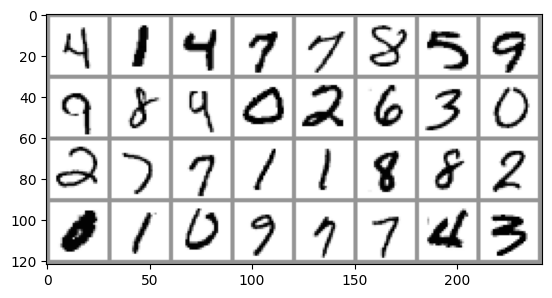

In [5]:
# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Create a grid from the batch of images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)